In [115]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

import DeformationModules as defmod
import Shooting as shoot
import Hamiltonian as ham
import UsefulFunctions as fun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
"""Dimension of the space"""
d = 2

In [158]:
σ = 0.5
nbPts = 2

#TransIdentical = defmod.TranslationsIdenticalCost(σ, d, nbPt)
Trans = defmod.Translations(σ, d, nbPts)

In [159]:
h = ham.Hamilt(Trans)

In [160]:
def H_r(GD, MOM):
    return hamiltonian(GD, MOM, hamiltonian.Cont_geo(GD, MOM))

In [161]:
GD_Trans = torch.tensor([[4., 2.], [0., 1.]], requires_grad=True).view(-1)
MOM_Trans = torch.tensor([[0., 0.5], [0.5, 0.5]], requires_grad=True).view(-1)

In [162]:
cont = hamiltonian.Cont_geo(GD_Trans, MOM_Trans)
cond_id = hamiltonian.Cont_geo(GD_Trans, MOM_Trans)

In [164]:
GD_final, MOM_final = shoot.shoot(Trans, GD_Trans, MOM_Trans, H_r, 10)
print(GD_final.view(-1, 2))
print(MOM_final.view(-1, 2))
print(cont.view(-1, 2))

tensor([[3.9993, 2.9218],
        [1.0486, 1.9474]], grad_fn=<ViewBackward>)
tensor([[8.4299e-06, 4.3372e-01],
        [5.8959e-01, 4.7668e-01]], grad_fn=<ViewBackward>)
tensor([[-5.5274e-08,  4.9117e-01],
        [ 4.9117e-01,  4.8201e-01]], grad_fn=<ViewBackward>)


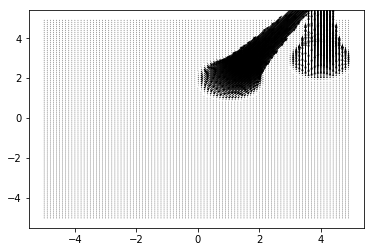

In [165]:
nx, ny = 100, 100
sx, sy = 10, 10
x, y = torch.meshgrid([torch.arange(0, nx), torch.arange(0, ny)])
x = sx*(x.type(torch.FloatTensor)/nx - 0.5)
y = sy*(y.type(torch.FloatTensor)/ny - 0.5)
"""u, v = torch.zeros([nx, ny]), torch.zeros([nx, ny])"""

u, v = fun.vec2grid(Trans(GD_final, cont, fun.grid2vec(x, y).type(torch.FloatTensor)), nx, ny)

plt.quiver(x.numpy(), y.numpy(), u.detach().numpy(), v.detach().numpy())